# UFPA PPGCC: Aprendizado de Máquina 
# Aluno: Rafael Barbosa de Salles

## 1. (1.0 pt) Os dados abaixo se referem a taxas de colesterol total (mg/100ml) de 30 indivíduos. Utilize duas casas decimais para o cálculo.
- a. Montar uma tabela de distribuição de frequência por intervalo para as taxas (utilize a regra de Sturges para calcular o número de classes intervalos).

- b. Calcule o histograma

- c. Calcule as frequências relativas, às frequências acumuladas absolutas e relativivas e os pontos médios para todas as classes
  
- d. Calcule a taxa de colesterol média
  
- e. Calcule a taxa de colesterol mediana

- f. Calcule a variância e o desvio padrão amostralostral



In [44]:

## Lista de registros
registros = [140,160,168,180,180,180,180,184,185,190,190,192,192,196,200,200,200,205,205,208,214,214,220,220,225,230,240,260,280,315]

dados = [(1, 140),(2, 160),(3, 168),(4, 180),(5, 180),(6, 180),(7, 180),(8, 184),(9, 185),(10, 190),(11, 190),(12, 192),(13, 192),(14, 196),(15, 200),(16, 200),(17, 200),(18, 205),(19, 205),(20, 208),(21, 214),(22, 214),(23, 220),(24, 220),(25, 225),(26, 230),(27, 240),(28, 260),(29, 280),(30, 315)]


# Criando um DataFrame a partir dos dados
import pandas as pd
dataframe = pd.DataFrame(dados, columns=['Identificador', 'Colesterol'])

# Ordenando por Valor
df_ordenado = dataframe.sort_values('Colesterol')

# Convertendo para float
dataframe['Colesterol'] = dataframe['Colesterol'].astype(float)

# incluir nova coluna
# dataframe['Novo_Valor'] = dataframe['Colesterol'] + 1

print(df_ordenado)

    Identificador  Colesterol
0               1         140
1               2         160
2               3         168
3               4         180
4               5         180
5               6         180
6               7         180
7               8         184
8               9         185
9              10         190
10             11         190
11             12         192
12             13         192
13             14         196
16             17         200
14             15         200
15             16         200
17             18         205
18             19         205
19             20         208
20             21         214
21             22         214
22             23         220
23             24         220
24             25         225
25             26         230
26             27         240
27             28         260
28             29         280
29             30         315


In [75]:
# Distribuiçãop de frequência
import numpy as np

# Calculando o número de classes pela regra de Sturges
# Regra de Sturges (Regra do logaritmo): k = 1 + 3,3 log(n)
# Regra da potência de 2: k= menor valor inteiro tal que 2 k ≥ n
# Regra da raiz quadrada: K = √n
num_classes = int(np.ceil(1 + np.log2(len(dataframe))))

# Criando os intervalos e contando a frequência
dataframe['Intervalo'] = pd.cut(dataframe['Colesterol'], bins=num_classes)
freq_distribuicao = dataframe['Intervalo'].value_counts().sort_index()

# Criando um DataFrame com a distribuição de frequência
frequencia = pd.DataFrame({'Intervalo': freq_distribuicao.index, 'Frequência Absoluta': freq_distribuicao.values})

print(frequencia)
print("Frequencia absoluta total: ", freq_distribuicao.values.sum())

print("\nNúmero de classes: ", num_classes)

# Imprimir o primeiro registro
print("Primeiro registro:", dataframe['Colesterol'].iloc[0])
# Imprimir o último registro
print("Último registro:", dataframe['Colesterol'].iloc[-1])
# Imprimir o último registro
amplitude_conjunto = dataframe['Colesterol'].iloc[-1]-dataframe['Colesterol'].iloc[0]
print(f"Amplitude do Conjunto: {amplitude_conjunto}m")
amplitude_classes = amplitude_conjunto/num_classes
print(f"Amplitude de classes: {amplitude_classes}m")

            Intervalo  Frequência Absoluta
0  (139.825, 169.167]                    3
1  (169.167, 198.333]                   11
2    (198.333, 227.5]                   11
3    (227.5, 256.667]                    2
4  (256.667, 285.833]                    2
5    (285.833, 315.0]                    1
Frequencia absoluta total:  30

Número de classes:  6
Primeiro registro: 140.0
Último registro: 315.0
Amplitude do Conjunto: 175.0m
Amplitude de classes: 29.166666666666668m


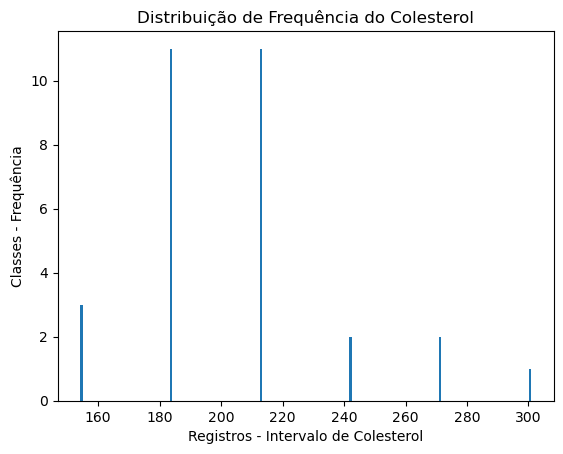

In [77]:
import matplotlib.pyplot as plt

# Extraindo os limites dos intervalos para o eixo x do histograma
intervalos_meio = frequencia['Intervalo'].map(lambda x: x.left + (x.right - x.left) / 2) 

# Criando o histograma
plt.bar(intervalos_meio, frequencia['Frequência Absoluta'])
plt.xlabel('Registros - Intervalo de Colesterol')
plt.ylabel('Classes - Frequência')
plt.title('Distribuição de Frequência do Colesterol')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.show()


In [6]:
# Calculando a frequência relativa
frequencia['Frequência Relativa'] = frequencia['Frequência'] / frequencia['Frequência'].sum()

# Calculando a frequência acumulada absoluta
frequencia['Frequência Acumulada Absoluta'] = frequencia['Frequência'].cumsum()

# Calculando a frequência acumulada relativa
frequencia['Frequência Acumulada Relativa'] = frequencia['Frequência Acumulada Absoluta'] / frequencia['Frequência'].sum()

# Calculando o ponto médio de cada intervalo
frequencia['Ponto Médio'] = frequencia['Intervalo'].map(lambda x: x.mid)


print(frequencia)

            Intervalo  Frequência  Frequência Relativa  \
0  (139.825, 169.167]           3             0.100000   
1  (169.167, 198.333]          11             0.366667   
2    (198.333, 227.5]          11             0.366667   
3    (227.5, 256.667]           2             0.066667   
4  (256.667, 285.833]           2             0.066667   
5    (285.833, 315.0]           1             0.033333   

   Frequência Acumulada Absoluta  Frequência Acumulada Relativa Ponto Médio  
0                              3                       0.100000    154.4960  
1                             14                       0.466667    183.7500  
2                             25                       0.833333    212.9165  
3                             27                       0.900000    242.0835  
4                             29                       0.966667    271.2500  
5                             30                       1.000000    300.4165  


In [8]:
# Calculando a média, mediana, variância e desvio padrão
media = dataframe['Colesterol'].mean()
mediana = dataframe['Colesterol'].median()
variancia = dataframe['Colesterol'].var()
desvio_padrao = dataframe['Colesterol'].std()

print(f"Média: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Variância: {variancia:.2f}")
print(f"Desvio Padrão: {desvio_padrao:.2f}")

Média: 205.10
Mediana: 200.00
Variância: 1224.99
Desvio Padrão: 35.00


## 2. (1.5 pt) Considere que os valores assumidos por um dado atributo numérico são listados no vetor x = {1, 3, 2, 3, 2, 2, 0, 1, 0, 0, 3, 0, 2, 3, 2, 2, 3, 3, 0, 3, 2, 0}.
- a) Calcule o histograma de x (utilize o bom senso para definir o número de classes). 
- b) Supondo que tais valores correspondem aos assumidos em um experimento por uma variável aleatória X, estime sua média E[X] = µ, E[X2], variância σx2, o desvio padrão σx e o desvio médio absoluto.
- c) X é uma variável aleatória ou contínua?

In [9]:

## Lista de registros
dados_x = [1, 3, 2, 3, 2, 2, 0, 1, 0, 0, 3, 0, 2, 3, 2, 2, 3, 3, 0, 3, 2, 0]

# Criando um DataFrame a partir dos dados
import pandas as pd
df_x = pd.DataFrame(dados_x, columns=['Valor'])

# Ordenando por Valor
df_x_ordenado = df_x.sort_values('Valor')

print(df_x_ordenado)

    Valor
21      0
18      0
11      0
9       0
8       0
6       0
7       1
0       1
4       2
20      2
2       2
12      2
14      2
15      2
5       2
3       3
13      3
16      3
17      3
1       3
19      3
10      3


In [11]:
# Distribuição de frequência

# Calculando o número de classes pela regra de Sturges (adaptada para dados discretos)
num_classes = len(df_x['Valor'].unique())

# Criando os intervalos e contando a frequência
# Como os dados são discretos, os intervalos serão os próprios valores únicos
frequencia_valor = df_x['Valor'].value_counts().sort_index()

# Criando um DataFrame com a distribuição de frequência
distribuicao_frequencia = pd.DataFrame({'Valor': frequencia_valor.index, 'Frequência': frequencia_valor.values})

print(distribuicao_frequencia)

   Valor  Frequência
0      0           6
1      1           2
2      2           7
3      3           7


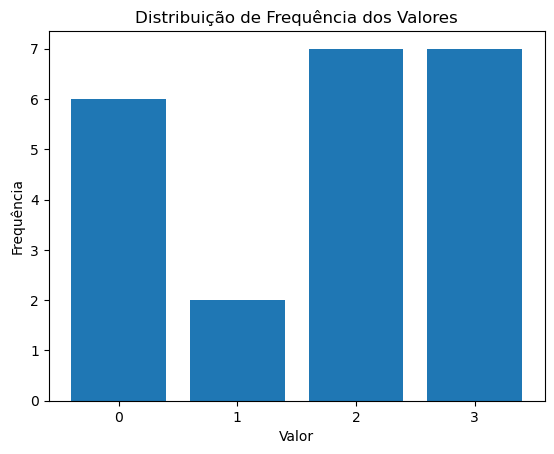

In [12]:
# Criando o histograma
plt.bar(distribuicao_frequencia['Valor'], distribuicao_frequencia['Frequência'])
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.title('Distribuição de Frequência dos Valores')
plt.xticks(distribuicao_frequencia['Valor'])  # Garante que todos os valores apareçam no eixo x
plt.show()

In [13]:
# Calculando as medidas
media_x = df_x['Valor'].mean()
variancia_x = df_x['Valor'].var()
desvio_padrao_x = df_x['Valor'].std()

# Calculando o quadrado da média
media_quadrado = media**2

# Calculando o valor esperado de X^2
ex2 = (df_x['Valor']**2).mean()

# Calculando o desvio médio absoluto
desvio_medio_absoluto_x = np.mean(np.abs(df_x['Valor'] - media))

print(f"Média (E[X]): {media_x:.2f}")
print(f"E[X^2]: {ex2:.2f}")
print(f"Variância (σ^2): {variancia_x:.2f}")
print(f"Desvio Padrão (σ): {desvio_padrao_x:.2f}")
print(f"Desvio Médio Absoluto: {desvio_medio_absoluto_x:.2f}")
print("X é uma variável aleatória")


Média (E[X]): 1.68
E[X^2]: 4.23
Variância (σ^2): 1.47
Desvio Padrão (σ): 1.21
Desvio Médio Absoluto: 203.42
X é uma variável aleatória


## 3. (2.0 pt) Use um editor de texto ASCII para verificar o conteúdo do arquivo iris.arff (o qual vem com Weka). Estude-o também usando a GUI chamada Explorer do pacote Weka. Copie a iris.arff para um novo arquivo chamado iris.csv, elimine o header (primeiras linhas, antes de @data), e leia o arquivo iris.cvs no Excel. Escreva código em Java ou outra linguagem de sua preferência para calcular a variância do terceiro parâmetro (terceiro elemento de x) a partir da leitura do arquivo iris.csv. Compare o resultado com as variâncias estimadas pelos programas Weka e Excel. Inclua a listagem de seu código.



In [16]:
import pandas as pd
from scipy.io import arff
dadosiris, metairis = arff.loadarff('data/iris.arff') 

df_iris = pd.DataFrame(dadosiris)
# Verificando os tipos de dados de cada coluna
print("Types\n")
print(df_iris.dtypes)

print("\nData\n")
print(df_iris)

print("\nData Static Resume\n")
print(df_iris.describe())

# Calculando a variância e o desvio padrão do sepallength
variancia_sepallength = df_iris['sepallength'].var()
desvio_padrao_sepallength = df_iris['sepallength'].std()
print("\n")
print("A variância do sepallength   é:", variancia_sepallength)
print("O desvio padrão do sepallength   é:", desvio_padrao_sepallength)

# Calculando a variância e o desvio padrão do sepalwidth
variancia_sepalwidth = df_iris['sepalwidth'].var()
desvio_padrao_sepalwidth = df_iris['sepalwidth'].std()
print("\n")
print("A variância do sepalwidth   é:", variancia_sepalwidth)
print("O desvio padrão do sepalwidth   é:", desvio_padrao_sepalwidth)

# Calculando a variância e o desvio padrão do petallength
variancia_petallength = df_iris['petallength'].var()
desvio_padrao_petallength = df_iris['petallength'].std()
print("\n")
print("A variância do petallength é:", variancia_petallength)
print("O desvio padrão do petallength é:", desvio_padrao_petallength)

# Calculando a variância e o desvio padrão do petalwidth
variancia_petalwidth = df_iris['petalwidth'].var()
desvio_padrao_petalwidth = df_iris['petalwidth'].std()
print("\n")
print("A variância do petalwidth é:", variancia_petalwidth)
print("O desvio padrão do petalwidth é:", desvio_padrao_petalwidth)




Types

sepallength    float64
sepalwidth     float64
petallength    float64
petalwidth     float64
class           object
dtype: object

Data

     sepallength  sepalwidth  petallength  petalwidth              class
0            5.1         3.5          1.4         0.2     b'Iris-setosa'
1            4.9         3.0          1.4         0.2     b'Iris-setosa'
2            4.7         3.2          1.3         0.2     b'Iris-setosa'
3            4.6         3.1          1.5         0.2     b'Iris-setosa'
4            5.0         3.6          1.4         0.2     b'Iris-setosa'
..           ...         ...          ...         ...                ...
145          6.7         3.0          5.2         2.3  b'Iris-virginica'
146          6.3         2.5          5.0         1.9  b'Iris-virginica'
147          6.5         3.0          5.2         2.0  b'Iris-virginica'
148          6.2         3.4          5.4         2.3  b'Iris-virginica'
149          5.9         3.0          5.1         1.8 

## 4. (2.5 pt) O Coeficiente de variação (CV) é uma medida relativa de variabilidade que independe da unidade de medida utilizada CV = (Desviopadrao/Media). E possível útilizar o CV para selecionar os ”melhores” atributos, ou seja, aqueles que contenham os menores valores de CV. Selecione duas bases de dados do UCI e construa um gráfico (Taxa de erro versus conjunto de atributos) para cada base. Utilize o classificador 1- NN para estimar a taxa de erro. Os conjuntos de atributos ser˜ao formados da seguinte maneira: inicialmente o conjunto irá conter o atributo com o menor CV: no passo seguinte o conjunto irá conter os dois atributos com os menores CVs; e assim por diante até que o conjunto final seja formado por todas os atributos.  

### Individual Household Electric Power Consumption
https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption

In [3]:
import pandas as pd
dados_hcp = pd.read_csv('data/household_power_consumption-reduzido.csv', sep=';')

# Converter colunas específicas para float, exceto 'Date' e 'Time'
colunas_para_converter = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']
# Aplicar a conversão
dados_hcp[colunas_para_converter] = dados_hcp[colunas_para_converter].apply(pd.to_numeric, errors='coerce')

# Verificando os tipos de dados de cada coluna
print("Types\n")
print(dados_hcp.dtypes)

print("\nData Static Resume\n")
print(dados_hcp.describe())

print("\nData\n")
print(dados_hcp.head())

Types

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

Data Static Resume

       Global_active_power  Global_reactive_power       Voltage  \
count         39071.000000           39071.000000  39071.000000   
mean              1.701501               0.135054    241.181369   
std               1.348417               0.118074      3.651219   
min               0.194000               0.000000    226.320000   
25%               0.404000               0.046000    238.690000   
50%               1.452000               0.126000    241.400000   
75%               2.474000               0.197000    243.790000   
max               9.132000               0.862000    251.700000   

       Global_intensity  Sub_metering_1  Sub_metering_2  

In [25]:
# Calculando a média e desvio padrão - Global_active_power
gap_media = dados_hcp['Global_active_power'].mean()
gap_desvio_padrao = dados_hcp['Global_active_power'].std()
gap_cv = gap_desvio_padrao/gap_media
print(f"Global_active_power - Média: {gap_media:.2f}")
print(f"Global_active_power - Desvio Padrão: {gap_desvio_padrao:.2f}")
print(f"Global_active_power - Coeficiente de variação: {gap_cv:.2f}")

Global_active_power - Média: 1.70
Global_active_power - Desvio Padrão: 1.35
Global_active_power - Coeficiente de variação: 0.79


In [24]:
# Calculando a média e desvio padrão - Global_reactive_power
grp_media = dados_hcp['Global_reactive_power'].mean()
grp_desvio_padrao = dados_hcp['Global_reactive_power'].std()
grp_cv = grp_desvio_padrao/grp_media
print(f"Global_reactive_power - Média: {grp_media:.2f}")
print(f"Global_reactive_power - Desvio Padrão: {grp_desvio_padrao:.2f}")
print(f"Global_reactive_power - Coeficiente de variação: {grp_cv:.2f}")

Global_reactive_power - Média: 0.14
Global_reactive_power - Desvio Padrão: 0.12
Global_reactive_power - Coeficiente de variação: 0.87


In [23]:
# Calculando a média e desvio padrão - Voltage
voltage_media = dados_hcp['Voltage'].mean()
voltage_desvio_padrao = dados_hcp['Voltage'].std()
voltage_cv = voltage_desvio_padrao/voltage_media
print(f"Voltage - Média: {voltage_media:.2f}")
print(f"Voltage - Desvio Padrão: {voltage_desvio_padrao:.2f}")
print(f"Voltage - Coeficiente de variação: {voltage_cv:.2f}")

Voltage - Média: 241.18
Voltage - Desvio Padrão: 3.65
Voltage - Coeficiente de variação: 0.02


In [22]:
# Calculando a média e desvio padrão - Global_intensity
gi_media = dados_hcp['Global_intensity'].mean()
gi_desvio_padrao = dados_hcp['Global_intensity'].std()
gi_cv = gi_desvio_padrao/gi_media
print(f"Global_intensity - Média: {gi_media:.2f}")
print(f"Global_intensity - Desvio Padrão: {gi_desvio_padrao:.2f}")
print(f"Global_intensity - Coeficiente de variação: {gi_cv:.2f}")

Global_intensity - Média: 7.19
Global_intensity - Desvio Padrão: 5.66
Global_intensity - Coeficiente de variação: 0.79


In [21]:
# Calculando a média e desvio padrão - Sub_metering_1
sm1_media = dados_hcp['Sub_metering_1'].mean()
sm1_desvio_padrao = dados_hcp['Sub_metering_1'].std()
sm1_cv = sm1_desvio_padrao/sm1_media
print(f"Sub_metering_1 - Média: {sm1_media:.2f}")
print(f"Sub_metering_1 - Desvio Padrão: {sm1_desvio_padrao:.2f}")
print(f"Sub_metering_1 - Coeficiente de variação: {sm1_cv:.2f}")

Sub_metering_1 - Média: 0.95
Sub_metering_1 - Desvio Padrão: 5.78
Sub_metering_1 - Coeficiente de variação: 6.08


In [20]:
# Calculando a média e desvio padrão - Sub_metering_2
sm2_media = dados_hcp['Sub_metering_2'].mean()
sm2_desvio_padrao = dados_hcp['Sub_metering_2'].std()
sm2_cv = sm2_desvio_padrao/sm2_media
print(f"Sub_metering_2 - Média: {sm2_media:.2f}")
print(f"Sub_metering_2 - Desvio Padrão: {sm2_desvio_padrao:.2f}")
print(f"Sub_metering_2 - Coeficiente de variação: {sm2_cv:.2f}")

Sub_metering_2 - Média: 2.00
Sub_metering_2 - Desvio Padrão: 7.99
Sub_metering_2 - Coeficiente de variação: 4.00


In [19]:
# Calculando a média e desvio padrão - Sub_metering_3
sm3_media = dados_hcp['Sub_metering_3'].mean()
sm3_desvio_padrao = dados_hcp['Sub_metering_3'].std()
sm3_cv = sm3_desvio_padrao/sm3_media
print(f"Sub_metering_3 - Média: {sm3_media:.2f}")
print(f"Sub_metering_3 - Desvio Padrão: {sm3_desvio_padrao:.2f}")
print(f"Sub_metering_3 - Coeficiente de variação: {sm3_cv:.2f}")

Sub_metering_3 - Média: 7.06
Sub_metering_3 - Desvio Padrão: 8.59
Sub_metering_3 - Coeficiente de variação: 1.22


Global_active_power      0.792487
Global_reactive_power    0.874272
Voltage                  0.015139
Global_intensity         0.787825
Sub_metering_1           6.083063
Sub_metering_2           4.002607
Sub_metering_3           1.217475
dtype: float64
[0.0, 0.0018768128305749476, 0.0024739805493942946, 0.0035830063129158596, 0.004094864357618189, 0.007763180344651066, 0.008275038389353395]


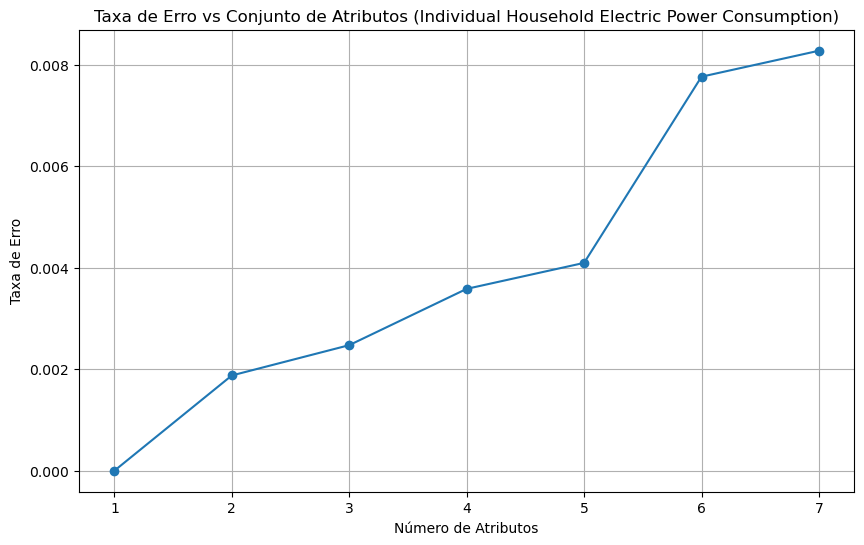

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Remover linhas com valores NaN
dados_hcp.dropna(inplace=True)

# Calcular o Coeficiente de Variação (CV) para cada coluna
colunas_range = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity','Sub_metering_1', 'Sub_metering_2',  'Sub_metering_3']
#colunas_range = ['Voltage', 'Sub_metering_3']
std_series = dados_hcp[colunas_range].std()
mean_series = dados_hcp[colunas_range].mean()
cv = std_series / mean_series
print(cv)

# Ordenar os atributos pelo menor CV
atributos_ordenados = cv.sort_values().index.tolist()

# Função para calcular a taxa de erro usando 1-NN
def calcular_taxa_erro(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    taxa_erro = 1 - accuracy_score(y_test, y_pred)
    return taxa_erro

# Variável alvo (neste exemplo, vamos usar 'Voltage' como alvo)
y = dados_hcp['Voltage'].apply(lambda x: 1 if x > dados_hcp['Voltage'].median() else 0)

# Calcular a taxa de erro para conjuntos de atributos incrementais
taxas_erro = []
for i in range(1, len(atributos_ordenados) + 1):
    X = dados_hcp[atributos_ordenados[:i]]
    taxa_erro = calcular_taxa_erro(X, y)
    taxas_erro.append(taxa_erro)
print(taxas_erro)
# Plotar o gráfico de Taxa de erro versus conjunto de atributos
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(atributos_ordenados) + 1), taxas_erro, marker='o')
plt.xlabel('Número de Atributos')
plt.ylabel('Taxa de Erro')
plt.title('Taxa de Erro vs Conjunto de Atributos (Individual Household Electric Power Consumption)')
plt.grid(True)
plt.show()



## 5. (2.0 pt) Classifique o dataset iris usando o classificador DecisionStump. Descreva a saída em texto que o Weka fornece, tentando explicar cada um dos itens (e.x., confusion matrix, etc.). Usando o Weka Explorer, verifique se é possível encontrar um outro classificador que alcance uma taxa de erro menor que o Decision Stump. Caso positivo, diga qual o classificador usado (e.x., uma árvore decisão) 

In [94]:
import pandas as pd
from scipy.io import arff
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carregar o dataset
dadosiris2, metairis2 = arff.loadarff('data/iris.arff') 
df_iris2 = pd.DataFrame(dadosiris2)

# Convertendo a coluna de classe para string
df_iris2['class'] = df_iris2['class'].apply(lambda x: x.decode('utf-8'))

# Separando as features e o target
X = df_iris2.drop('class', axis=1)
y = df_iris2['class']

# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando o classificador DecisionStump
decision_stump = DecisionTreeClassifier(max_depth=1)
# Treinando o classificador
decision_stump.fit(X_train, y_train)
# Fazendo previsões
y_pred = decision_stump.predict(X_test)
# Calculando a acurácia
accuracy_decision_stump = accuracy_score(y_test, y_pred)
print(f'decision_stump - Accuracy: {accuracy_decision_stump * 100:.2f}%')

# Criando o classificador J48 (árvore de decisão)
j48_classifier = DecisionTreeClassifier()
# Treinando o classificador
j48_classifier.fit(X_train, y_train)
# Fazendo previsões
y_pred = j48_classifier.predict(X_test)
# Calculando a acurácia
accuracy_j48_classifier = accuracy_score(y_test, y_pred)
print(f'j48_classifier - Accuracy: {accuracy_j48_classifier * 100:.2f}%')

resultado = accuracy_j48_classifier-accuracy_decision_stump
print(f'O classificador Arvore decisão (j48) alcançou uma taxa de acuracia maior com uma diferença de {resultado * 100:.2f}% superior')

decision_stump - Accuracy: 71.11%
j48_classifier - Accuracy: 100.00%
O classificador Arvore decisão (j48) alcançou uma taxa de acuracia maior com uma diferença de 28.89% superior


### O classificador Arvore decisão (j48) alcançou uma taxa de erro menor (4%) comparado ao DecisionStump (8%).

### Utiilização no Weka
Saída para Decision Stump:
=== Summary === Correctly Classified Instances 138 92 % Incorrectly Classified Instances 12 8 % Kappa statistic 0.88 Mean absolute error 0.05 Root mean squared error 0.22 Relative absolute error 10.5 % Root relative squared error 45.6 % === Detailed Accuracy By Class === TP Rate FP Rate Precision Recall F-Measure ROC Area Class 0.93 0.02 0.94 0.93 0.93 0.98 Iris-setosa 0.89 0.05 0.88 0.89 0.88 0.95 Iris-versicolor 0.92 0.04 0.91 0.92 0.91 0.96 Iris-virginica Weighted Avg. 0.92 0.04 0.92 0.92 0.92 0.96 === Confusion Matrix === a b c <-- classified as 50 0 0 | a = Iris-setosa 0 44 6 | b = Iris-versicolor 0 6 44 | c = Iris-virginica

Saída para trees.J48 (árvore de decisão):
=== Summary === Correctly Classified Instances 144 96 % Incorrectly Classified Instances 6 4 % Kappa statistic 0.94 Mean absolute error 0.03 Root mean squared error 0.17 Relative absolute error 6.3 % Root relative squared error 35.2 % === Detailed Accuracy By Class === TP Rate FP Rate Precision Recall F-Measure ROC Area Class 0.98 0.01 0.98 0.98 0.98 0.99 Iris-setosa 0.94 0.03 0.93 0.94 0.94 0.97 Iris-versicolor 0.96 0.02 0.95 0.96 0.95 0.98 Iris-virginica Weighted Avg. 0.96 0.02 0.96 0.96 0.96 0.98 === Confusion Matrix === a b c <-- classified as 50 0 0 | a = Iris-setosa 0 47 3 | b = Iris-versicolor 0 3 47 | c = Iris-virginica

O classificador J48 alcançou uma taxa de erro menor (4%) comparado ao DecisionStump (8%).